Functions to Get News Data

In [ ]:
def get_news(month, day):
  google_news = GNews()
  google_news.max_results = 10
  google_news.period = '12h'  # News from last 7 days
  google_news.country = 'United States'
  google_news.language = 'english'
  google_news.start_date = (2022, month, day)
  if day != 31:
    google_news.end_date = (2022, month, day+1)
  else:
    google_news.end_date = (2023, 1, 1)
  json_resp = google_news.get_news('Tesla')
  return json_resp


def parse_news(response):
  info = []
  months = {"Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04", "May": "05", "Jun": "06",
          "Jul": "07", "Aug": "08", "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12"}

  for i in range(len(response)):
    string_date = response[i]['published date']
    separated_string_date = string_date.split(" ")
    month, day = months[separated_string_date[2]], separated_string_date[1]
    article = {"Title" : response[i]['title'], "Date" : f"{month}/{day}/2022"}
    info.append(article)
  return info



In [ ]:
news_2022 = []

In [ ]:
days_in_month = {1: 31, 2: 28, 3: 31, 4: 30, 5: 31, 6: 30,
                 7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31}

for i in range(12, 13):
  for j in range(1, days_in_month[i]):
    response = get_news(i, j)
    news = parse_news(response)
    news_2022.append(news)


<ipython-input-7-5380863bf921>:12: UserWarning: 
Period (12h) will be ignored in favour of the start and end dates
  json_resp = google_news.get_news('Tesla')


In [ ]:
# news_2022

Convert News to Dataframe and Sort

In [ ]:
import pandas as pd

news_2022_flat = [article for month_news in news_2022 for article in month_news]
df_2022 = pd.DataFrame(news_2022_flat)
df_2022['Date'] = pd.to_datetime(df_2022['Date'], format='%m/%d/%Y')
df_2022_sorted = df_2022.sort_values(by='Date')
print(df_2022_sorted)


                                                  Title       Date
1     First Tesla electric car supercharger station ... 2022-01-01
2     Lucid and Rivian are future of sexy electric c... 2022-01-01
3     Tesla Model 3, Y prices hiked in China for rea... 2022-01-01
4     How to Fix Tesla Model 3/Y Heater Not Working ... 2022-01-01
5     Tesla Model Q Looks Like a More Practical Mode... 2022-01-01
...                                                 ...        ...
3360  Why one green-focused investor has 'no interes... 2022-12-30
3361  Opinion | Elon Musk’s Antics Hurt Tesla’s Demo... 2022-12-30
3362  Tesla Offering $7500 Off Model S and Model X U... 2022-12-30
3363  Do You Really Need a Single-Stock Tesla ETF? -... 2022-12-30
3365  Tesla supplier Panasonic seeks to balance US a... 2022-12-30

[3366 rows x 2 columns]


In [ ]:
df_2022_sorted.to_csv("Headlines_2022.csv")

NLP Sentiment Analysis

In [ ]:
!pip install transformers

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from transformers import pipeline
import nltk

In [ ]:
nltk.download('vader_lexicon')
vader_analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score_textblob(headline):
    analysis = TextBlob(headline)
    return analysis.sentiment.polarity

df_vader = df_2022_sorted.copy()
df_textblob = df_2022_sorted.copy()

df_vader['Sentiment_VADER'] = df_vader['Title'].apply(lambda x: vader_analyzer.polarity_scores(x)['compound'])
df_textblob['Sentiment_TextBlob'] = df_textblob['Title'].apply(get_sentiment_score_textblob)

df_sentiment_2022 = pd.DataFrame({
    'Title': df_2022_sorted['Title'],
    'Date': df_2022_sorted['Date'],
    'Sentiment_VADER': df_vader['Sentiment_VADER'],
    'Sentiment_TextBlob': df_textblob['Sentiment_TextBlob'],
})

df_sentiment_2022['Sentiment_Average'] = df_sentiment_2022[['Sentiment_VADER', 'Sentiment_TextBlob']].mean(axis=1)

print(df_sentiment_2022)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                  Title       Date  \
1     First Tesla electric car supercharger station ... 2022-01-01   
2     Lucid and Rivian are future of sexy electric c... 2022-01-01   
3     Tesla Model 3, Y prices hiked in China for rea... 2022-01-01   
4     How to Fix Tesla Model 3/Y Heater Not Working ... 2022-01-01   
5     Tesla Model Q Looks Like a More Practical Mode... 2022-01-01   
...                                                 ...        ...   
3360  Why one green-focused investor has 'no interes... 2022-12-30   
3361  Opinion | Elon Musk’s Antics Hurt Tesla’s Demo... 2022-12-30   
3362  Tesla Offering $7500 Off Model S and Model X U... 2022-12-30   
3363  Do You Really Need a Single-Stock Tesla ETF? -... 2022-12-30   
3365  Tesla supplier Panasonic seeks to balance US a... 2022-12-30   

      Sentiment_VADER  Sentiment_TextBlob  Sentiment_Average  
1              0.0000            0.250000           0.125000  
2              0.5267            

In [ ]:
df_sentiment_2022.head(5000)

NameError: ignored

In [ ]:
df_sentiment_2022.to_csv("Headlines2022_Sentiment_Analysis.csv")

In [ ]:
import pandas as pd
df = pd.read_csv("Headlines2022_Sentiment_Analysis.csv")

In [ ]:
headlines = df['Title']

In [ ]:
average_length = headlines.apply(lambda x: len(str(x).split())).mean()

print(f"The average string length in words is: {average_length:.2f}")

The average string length in words is: 13.72


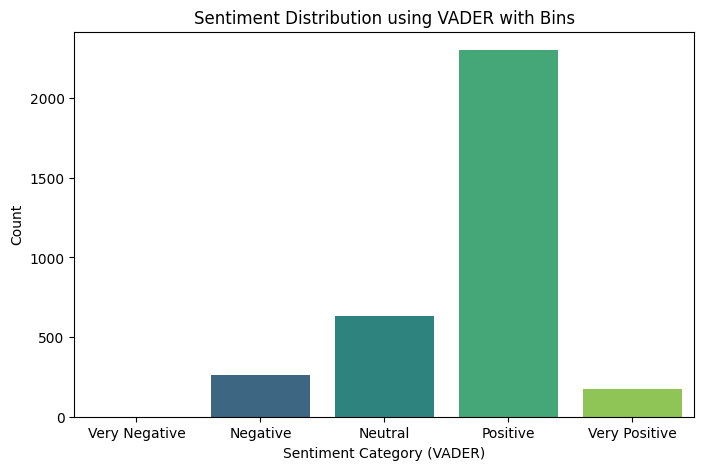

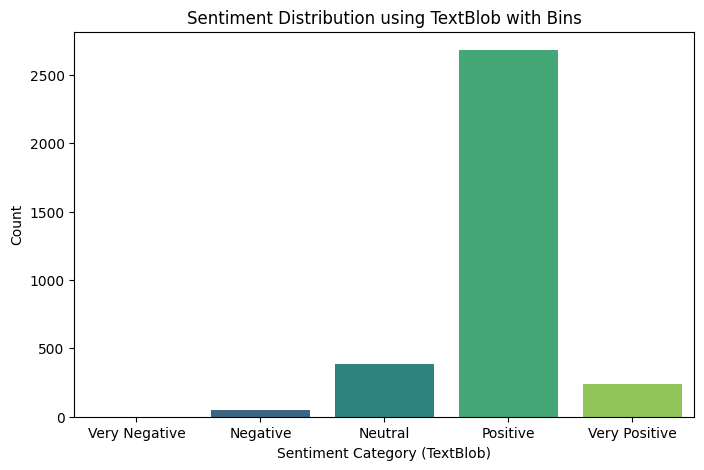

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Don't forget to import pandas if not already imported

# Bin VADER sentiment scores into categories
bins = [-1.5, -1, -0.5, 0, 0.5, 1]
labels = ['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive']
df['Sentiment_Category_VADER'] = pd.cut(df['Sentiment_VADER'], bins=bins, labels=labels, right=False)

# Bin TextBlob sentiment scores into categories
df['Sentiment_Category_TextBlob'] = pd.cut(df['Sentiment_TextBlob'], bins=bins, labels=labels, right=False)

# Bar Chart - Sentiment Distribution with Bins (VADER)
sentiment_counts_vader = df['Sentiment_Category_VADER'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts_vader.index, y=sentiment_counts_vader.values, palette="viridis")
plt.title('Sentiment Distribution using VADER with Bins')
plt.xlabel('Sentiment Category (VADER)')
plt.ylabel('Count')
plt.show()

# Bar Chart - Sentiment Distribution with Bins (TextBlob)
sentiment_counts_textblob = df['Sentiment_Category_TextBlob'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts_textblob.index, y=sentiment_counts_textblob.values, palette="viridis")
plt.title('Sentiment Distribution using TextBlob with Bins')
plt.xlabel('Sentiment Category (TextBlob)')
plt.ylabel('Count')
plt.show()


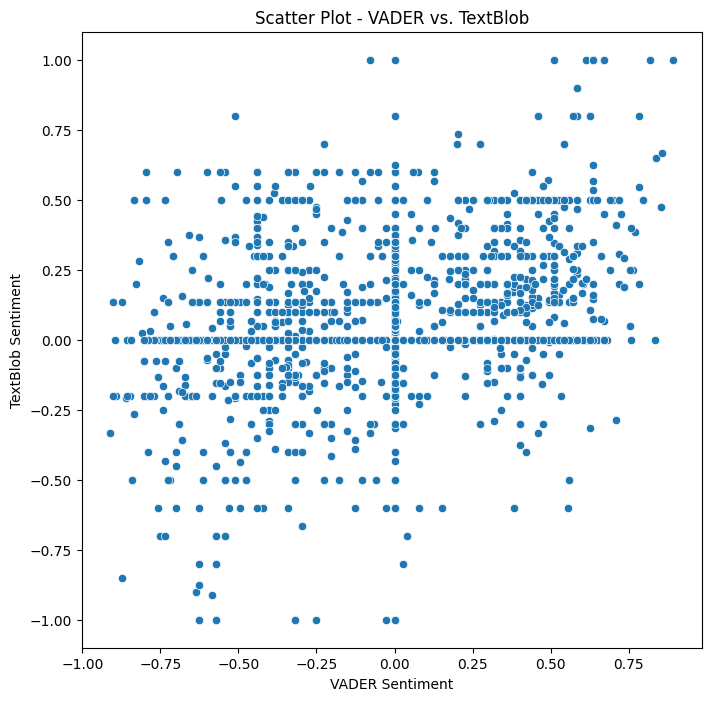

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot - VADER vs. TextBlob
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Sentiment_VADER', y='Sentiment_TextBlob', data=df)
plt.title('Scatter Plot - VADER vs. TextBlob')
plt.xlabel('VADER Sentiment')
plt.ylabel('TextBlob Sentiment')
plt.show()


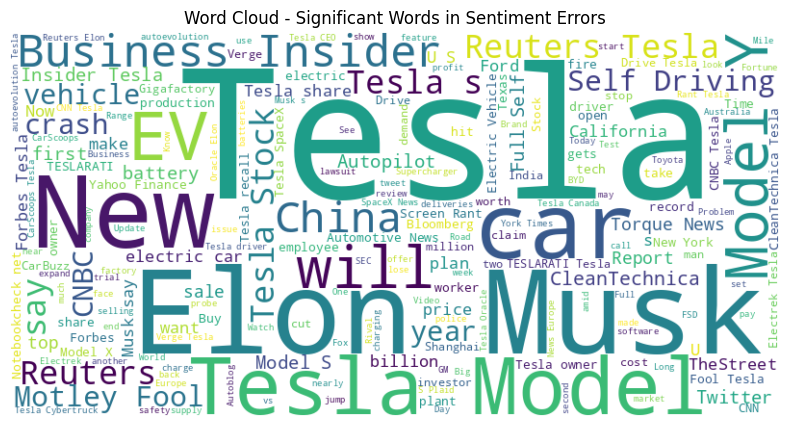

In [ ]:
from wordcloud import WordCloud

# Create a Word Cloud for significant words causing sentiment errors
significant_words = df.loc[df['Sentiment_VADER'] != df['Sentiment_TextBlob'], 'Title']
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(significant_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Significant Words in Sentiment Errors')
plt.show()


In [ ]:
df2 =